Generate SMILES of large scale combinatorial reactions. Contact Prajit Rajkumar (prajkumar@ucsd.edu) for any questions.

In [ ]:
#methylation with nh/nh2; acetylation with  oh; methylation oh, methylation with carboxyl

In [6]:
import pandas as pd
pd.read_csv("./smarts_reaction_database.csv")["reaction_smarts"]

KeyError: 'reaction_smarts'

In [ ]:
# @title Install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 8.3 MB/s eta 0:00:00


In [1]:
# @title Import dependencies
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd
from tqdm import tqdm

In [20]:
reaction = AllChem.ReactionFromSmarts("[C:4](=O)[O;D1:1].C>>[C:4](=O)[O;D2:1]C")
r1_mol = Chem.MolFromSmiles("OC(C(O)=O)(CC(O)=O)CC(O)=O")
molecules = reaction.RunReactants((r1_mol, Chem.MolFromSmiles("C")))

[11:27:42] reactant 1 has no mapped atoms.


IndexError: tuple index out of range

In [11]:
amidation_reaction = AllChem.ReactionFromSmarts("[N;D1:2][#6:3].[C:4](=O)[O;D1:1]>>[O:2].[C:4](=O)[N:1][#6:3]")
r1_mol = Chem.MolFromSmiles("CN")
r2_mol = Chem.MolFromSmiles("OC(C(O)=O)(CC(O)=O)CC(O)=O")
amidation_reaction.RunReactants((r1_mol, r2_mol))

((<rdkit.Chem.rdchem.Mol at 0x78e9342558c0>,
  <rdkit.Chem.rdchem.Mol at 0x78e9342c2500>),
 (<rdkit.Chem.rdchem.Mol at 0x78e9342c1bd0>,
  <rdkit.Chem.rdchem.Mol at 0x78e9342c2490>),
 (<rdkit.Chem.rdchem.Mol at 0x78e9342c30d0>,
  <rdkit.Chem.rdchem.Mol at 0x78e9342c06d0>))

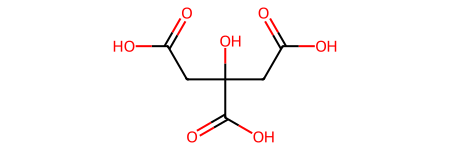

In [6]:
r1_mol

In [ ]:
# @title Input file name and names of columns containing compound name, SMILES, and sample ID
file_name = "AP_807-811.csv" # @param {"type":"string"}
sample_ID_column_name = "unique_sample_id" # @param {"type":"string"}
compound_name_column_name = "compound_name" # @param {"type":"string"}
SMILES_column_name = "SMILES" # @param {"type":"string"}

if file_name.endswith(".csv"):
    compound_list = pd.read_csv(f"/content/{file_name}")
elif file_name.endswith(".xlsx") or file_name.endswith(".xls"):
    compound_list = pd.read_excel(f"/content/{file_name}")
elif file_name.endswith(".tsv"):
    compound_list = pd.read_csv(f"/content/{file_name}", sep="\t")
elif file_name.endswith(".pkl"):
    compound_list = pd.read_pickle(f"/content/{file_name}")
else:
    compound_list = pd.read_csv(f"/content/{file_name}")

smiles_list = compound_list[SMILES_column_name]
names_list = compound_list[compound_name_column_name]
sample_ID_list = compound_list[sample_ID_column_name]

In [ ]:
# @title Add any additional column names with filler values to include in the output
column_names = "dataset_id, repository" # @param {"type":"string","placeholder":"unique_sample_id, dataset_id, repository"}
column_filler_values = "MSV000094559, MassIVE" # @param {"type":"string"}

column_names = column_names.split(",")
column_filler_values = column_filler_values.split(",")

column_names = [i.strip() for i in column_names]
column_filler_values = [i.strip() for i in column_filler_values]

In [ ]:
# @title Choose reaction type and enter the number of compounds acting as the first reactant
reaction_type = "Esterification, Alcohol Second" # @param ["Amidation, Amine First","Esterification, Alcohol First","Amidation, Amine Second","Esterification, Alcohol Second","Hydroxyl Methylation","Amine Methylation","Carboxyl Methylation"]
number_of_reactant_1 = 5 # @param {"type":"integer","placeholder":"Enter the number of the first type of reactant"}

In [ ]:
# @title Run Reactions; a notification about greater than permitted valence is normal
batch_ester_CO = "[C:4](=O)[O;D1:1].[O;D1:2][#6;!$(C=O):3]>>[O:2].[C:4](=O)[O:1][#6:3]"

batch_ester_OC = "[O;D1:2][#6;!$(C=O):3].[C:4](=O)[O;D1:1]>>[O:2].[C:4](=O)[O:1][#6:3]]"

batch_amine_CN = "[C:4](=O)[O;D1:1].[N;D1:2][#6:3]>>[O:2].[C:4](=O)[N:1][#6:3]"

batch_amine_NC = "[N;D1:2][#6:3].[C:4](=O)[O;D1:1]>>[O:2].[C:4](=O)[N:1][#6:3]"

batch_amine_secondary_NC = "[N:2]([#6:5])[#6:3].[C:4](=O)[O;D1:1]>>[O:2].[C:4](=O)[N:1]([#6:5])[#6:3]"

batch_amine_secondary_CN = "[C:4](=O)[O;D1:1].[N:2]([#6:5])[#6:3]>>[O:2].[C:4](=O)[N:1]([#6:5])[#6:3]"

batch_hydroxyl_methylation = "[O;D1:2][#6;!$(C=O):3]>>C[O;D2:2][#6;!$(C=O):3]"

batch_carboxyl_methylation = "[C:4](=O)[O;D1:1]>>[C:4](=O)[O;D2:1]C"

batch_amine_methylation = "[N;D1:2][#6:3]>>C[N;D2:2][#6:3]"

exclusion_list = ["N", "O", "o", "OCCO"]

product_list = []
product_name_list = []
product_ID_list = []

for i in tqdm(range(number_of_reactant_1)):
  r1_smiles = smiles_list[i]
  first_name = names_list[i]
  first_ID = sample_ID_list[i]
  for num, j in enumerate(smiles_list[number_of_reactant_1:]):
    second_name = names_list[number_of_reactant_1 + num]
    second_ID = sample_ID_list[number_of_reactant_1 + num]
    r2_smiles = Chem.CanonSmiles(j)
    try:
      r1_mol = Chem.MolFromSmiles(r1_smiles)
    except Exception as e:
      print(f"Exception: \"{e}\" at row {i + 1}")
      #print(r1_smiles)
      pass
    try:
      r2_mol = Chem.MolFromSmiles(r2_smiles)
    except Exception as e:
      print(f"Exception: \"{e}\" at row {number_of_reactant_1 + num + 2}")

    if reaction_type == "Esterification, Alcohol First":
      reaction = AllChem.ReactionFromSmarts(batch_ester_OC)
    elif reaction_type == "Esterification, Alcohol Second":
      reaction = AllChem.ReactionFromSmarts(batch_ester_CO)
    elif reaction_type == "Amidation, Amine First":
      reaction = AllChem.ReactionFromSmarts(batch_amine_NC)
    elif reaction_type == "Amidation, Amine Second":
      reaction = AllChem.ReactionFromSmarts(batch_amine_CN)
    elif reaction_type == "Amine Methylation":
      reaction = AllChem.ReactionFromSmarts(batch_amine_methylation)
    elif reaction_type == "Hydroxyl Methylation":
      reaction = AllChem.ReactionFromSmarts(batch_hydroxyl_methylation)
    elif reaction_type == "Carboxyl Methylation":
      reaction = AllChem.ReactionFromSmarts(batch_carboxyl_methylation)
    else:
      print("Invalid reaction type")
      break

    product = reaction.RunReactants((r1_mol, r2_mol))
    if product:
        for g in product:
            if Chem.MolToSmiles(g[1]) not in exclusion_list:
                try:
                    product_list.append(Chem.CanonSmiles(Chem.MolToSmiles(g[1])))
                    product_name_list.append(f"{first_name}_{second_name}")
                    product_ID_list.append(f"{first_ID}__SEPARATOR__{second_ID}")
                except Exception as e:
                    print(e)
    elif reaction_type == "Amidation, Amine First" or reaction_type == "Amidation, Amine Second":
        if reaction_type == "Amidation, Amine First":
            secondary_reaction = AllChem.ReactionFromSmarts(batch_amine_secondary_NC)
        else:
            secondary_reaction = AllChem.ReactionFromSmarts(batch_amine_secondary_CN)
        product = secondary_reaction.RunReactants((r1_mol, r2_mol))
        if product:
            for g in product:
                if Chem.MolToSmiles(g[1]) not in exclusion_list:
                    try:
                        product_list.append(Chem.CanonSmiles(Chem.MolToSmiles(g[1])))
                        product_name_list.append(f"{first_name}_{second_name}")
                        product_ID_list.append(f"{first_ID}__SEPARATOR__{second_ID}")
                    except:
                        pass
        else:
            print("***********************")
            print(r1_smiles)
            print(r2_smiles)
            print("***********************")
    else:
        print("=======================")
        print(r1_smiles)
        print(r2_smiles)
        print("=======================")

print(len(product_name_list))
combined_list = zip(product_ID_list, product_name_list, product_list)
combined_list = list(set(combined_list))
product_ID_list_unique = [i[0] for i in combined_list]
product_name_list_unique = [i[1] for i in combined_list]
product_list_unique = [i[2] for i in combined_list]

print(f"\n\n\nReactions finished running. A total number of {len(combined_list)} reactants was obtained.")

 40%|████      | 2/5 [00:00<00:00,  6.50it/s]

O=C(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F
C=CCCCCCCCCCCCCCC
O=C(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F
C=CCCCCCCCCCCCCCC


 80%|████████  | 4/5 [00:00<00:00,  7.68it/s]

O=C(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F
C=CCCCCCCCCCCCCCC
O=C(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F
C=CCCCCCCCCCCCCCC


100%|██████████| 5/5 [00:00<00:00,  7.18it/s]

O=C(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F
C=CCCCCCCCCCCCCCC
450



Reactions finished running. A total number of 395 reactants was obtained.


In [ ]:
product_name_list_unique

['tricosafluorododecanoic-acid_estrone',
 'perfluorononadecanoic-acid_1-octacosanol',
 'perfluorodecanoic-acid_D(+)-galactose',
 'tricosafluorododecanoic-acid_2,6-di-tert-butyl-4-methylphenol',
 'perfluorooctanoic-acid_2-butene-1,4-diol',
 'perfluoroundecanoic-acid_(S)-(-)-2-methyl-1-butanol',
 'perfluorononadecanoic-acid_farnesol',
 'perfluorodecanoic-acid_(S)-(+)-2-hexanol',
 'perfluorodecanoic-acid_2-dodecanol',
 'perfluorooctanoic-acid_(R)-(-)-methyl mandelate',
 'perfluoroundecanoic-acid_D(+)-galactose',
 'perfluoroundecanoic-acid_behenyl alcohol',
 'perfluoroundecanoic-acid_1-octacosanol',
 'perfluoroundecanoic-acid_(+)-α-Tocopherol',
 'tricosafluorododecanoic-acid_1,2-butanediol',
 'perfluorodecanoic-acid_1-octadecanol',
 'perfluorooctanoic-acid_cholesterol',
 'tricosafluorododecanoic-acid_2-dodecanol',
 'perfluorooctanoic-acid_1,2,6-trihydroxyhexane',
 'perfluorooctanoic-acid_D(-)-Fructose',
 'perfluorodecanoic-acid_2-ethylphenol',
 'perfluorooctanoic-acid_3-methyl-2-buten-1-ol

In [ ]:
# @title Export products to csv file. Please enter the file name.
output_file_name = "AP_807_811_output.csv" # @param {"type":"string","placeholder":"output_file.csv"}
sample_ID_determinant = "first reactant" # @param ["first reactant","second reactant"]

output_file_headers = column_names.copy()
output_file_headers.insert(0, sample_ID_column_name)
output_file_headers.append(SMILES_column_name)
output_file_headers.append(compound_name_column_name)

output_frame = pd.DataFrame(columns=output_file_headers)

product_ID_list_unique = [i.split("__SEPARATOR__")[0] if sample_ID_determinant == "first reactant" else i.split("__SEPARATOR__")[1] for i in product_ID_list_unique]
output_frame[sample_ID_column_name] = product_ID_list_unique
output_frame[compound_name_column_name] = product_name_list_unique
output_frame[SMILES_column_name] = product_list_unique
for i in range(len(column_names)):
  output_frame[column_names[i]] = column_filler_values[i]

output_frame.to_csv(f"{output_file_name}", index=False)
